In [1]:
# color training set based on density using leave-one-out
# and plot histogram

In [2]:
from astropy.io import fits
import custom_model
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

from scipy import stats
training_label_df = pd.read_csv('./data/label_dataframes/training_labels.csv')
training_labels = ['galah_teff', 'galah_logg','galah_feh', 'galah_alpha', 'galah_vbroad']

In [3]:
# old code that doesn't use leave-one-out
# data = training_label_df[training_labels].to_numpy()
# values = data.T
# kde = stats.gaussian_kde(values)
# density = kde(values)
# training_label_df['training_density'] = density

In [4]:
training_density = []
for i in range(len(training_label_df)):
    # get labels of star in training set 
    held_out_values = training_label_df[training_labels].iloc[i].to_numpy()
    
    # compute KDE, leaving out star
    data = training_label_df[training_labels].drop([i]).to_numpy()
    values = data.T
    kde = stats.gaussian_kde(values)

    # get the density for the labels that were left out
    density = kde(held_out_values)
    training_density.append(density[0])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'number of stars in training set')

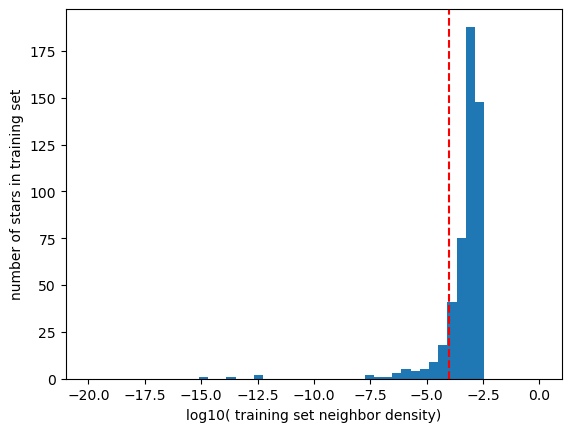

In [5]:
# something is going wrong
training_label_df['training_density'] = training_density
%pylab inline

hist(np.log10(training_label_df.training_density), bins=np.linspace(-20,0,50))
axvline(-4, color='r', linestyle='--')
xlabel('log10( training set neighbor density)')
ylabel('number of stars in training set')

/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_11909/4085357630.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


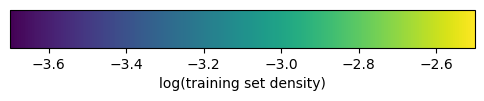

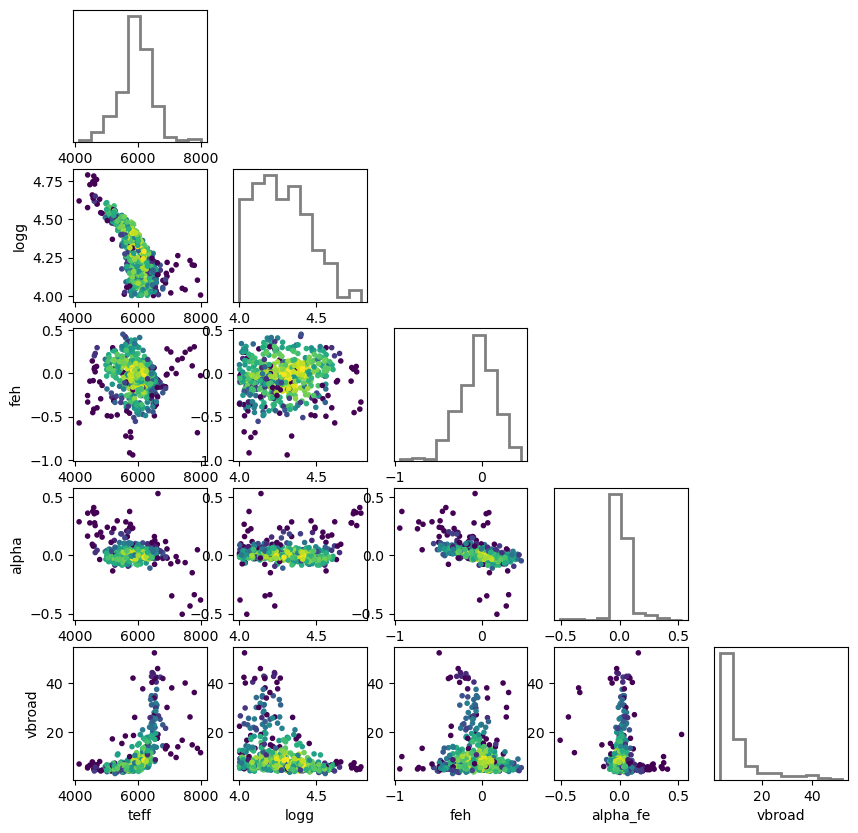

In [6]:
def plot_training_label_corner(training_label_df):
    """
    Plot label distributions or training set
    """
    def plot_hist(label):
        label_str = 'galah_{}'.format(label)
        plt.hist(training_label_df[label_str], histtype='step', color='grey', lw=2)
        plt.yticks([])

    def plot_2d_dist(label1, label2):
        label1_str = 'galah_{}'.format(label1)
        label2_str = 'galah_{}'.format(label2)
        density = training_label_df['training_density']
        vminval = 0.0001
        maxval = 0.002
        plt.scatter(
            training_label_df[label1_str], 
            training_label_df[label2_str], 
            c=np.log10(density),
            vmin=-4, vmax=-2.5,
            marker='.')
    
    # plot the colorbar
    import matplotlib as mpl
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(vmin=-3.7, vmax=-2.5)
    cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label('log(training set density)')
    fig.show()
    
    plt.figure(figsize=(10,10))
    plt.subplot(5,5,1);plot_hist('teff')
    plt.subplot(5,5,6);plt.ylabel('logg');plot_2d_dist('teff', 'logg')
    plt.subplot(5,5,7);plot_hist('logg')
    plt.subplot(5,5,11);plt.ylabel('feh');plot_2d_dist('teff', 'feh')
    plt.subplot(5,5,12);plot_2d_dist('logg', 'feh')
    plt.subplot(5,5,13);plt.xlabel('feh');plot_hist('feh')
    plt.subplot(5,5,16);plt.ylabel('alpha');plot_2d_dist('teff', 'alpha')
    plt.subplot(5,5,17);plot_2d_dist('logg', 'alpha')
    plt.subplot(5,5,18);plot_2d_dist('feh', 'alpha')
    plt.subplot(5,5,19);plt.xlabel('alpha');plot_hist('alpha')
    plt.subplot(5,5,21);plt.ylabel('vbroad');plt.xlabel('teff');plot_2d_dist('teff', 'vbroad')
    plt.subplot(5,5,22);plt.xlabel('logg');plot_2d_dist('logg', 'vbroad')
    plt.subplot(5,5,23);plt.xlabel('feh');plot_2d_dist('feh', 'vbroad')
    plt.subplot(5,5,24);plt.xlabel('alpha_fe');plot_2d_dist('alpha', 'vbroad')
    plt.subplot(5,5,25);plt.xlabel('vbroad');plot_hist('vbroad')
    
plot_training_label_corner(training_label_df)

In [8]:
# cutoff of -4 seems sonservative!
# it also doens't remove too many stars...
# I'll write this up and then move on.

# so I'll save these to fits files and pandas dataframes
# and re-train the cannon I guess
# be sure to save the training set in the model.
# and save it as iter1 or something.
# but will I need to run it to save the model and then re-run to load the right single star model?
# I think so... not ideal.
training_label_df.query('training_density > 1e-4')

,Unnamed: 0,source_id,DESIGNATION,sobject_id,galah_teff,galah_eteff,galah_logg,galah_elogg,galah_feh,galah_efeh,galah_alpha,galah_ealpha,galah_vbroad,galah_evbroad,rvs_spec_sig_to_noise,ra,dec,training_density
0,0,5371681550910421632,Gaia DR3 5371681550910421632,171228004202272,5926.6567,70.316818,4.383753,0.176447,-0.018817,0.042891,-0.018232,0.014179,6.988062,2.073375,173.205100,176.533258,-49.235666,0.003350
1,1,6003031637355425024,Gaia DR3 6003031637355425024,160611003101184,5349.1816,76.232166,4.527586,0.176707,0.104229,0.048795,-0.048362,0.016387,10.863514,2.115108,112.091010,232.774004,-40.576479,0.000808
2,2,5365738724921515776,Gaia DR3 5365738724921515776,170510001801102,5734.4507,71.330191,4.205732,0.177417,0.029679,0.043988,0.089597,0.018343,4.722425,2.087429,155.137450,157.469210,-46.057988,0.000341
3,3,4759967913193074688,Gaia DR3 4759967913193074688,170114002601196,5720.4634,72.635678,4.242907,0.179887,-0.289333,0.046387,0.105024,0.015305,5.001125,2.104962,108.637566,84.183348,-58.874355,0.000379
4,4,5247935945307908736,Gaia DR3 5247935945307908736,170415002501340,6088.5880,71.330807,4.003685,0.177342,-0.106877,0.046226,0.020871,0.014842,9.316949,2.090791,123.761170,138.210251,-66.842829,0.001017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,5431981860950849024,Gaia DR3 5431981860950849024,170418001601367,5933.5860,70.215021,4.411979,0.174767,0.113130,0.042670,-0.034321,0.014160,8.341236,2.070231,179.351410,147.377833,-39.537340,0.002281
501,501,4087798315837884928,Gaia DR3 4087798315837884928,170830002801135,5894.4785,72.608062,4.013375,0.177519,0.343147,0.046207,0.000632,0.015699,7.606139,2.094942,125.966340,288.687859,-17.017510,0.000388
502,502,2920312989438089600,Gaia DR3 2920312989438089600,151227004702151,6307.7754,69.980122,4.193317,0.175255,0.100688,0.043356,0.023013,0.014120,12.575756,2.070288,102.861350,100.690724,-26.359623,0.000853
503,503,5229295963337955072,Gaia DR3 5229295963337955072,170418002101084,6008.0596,70.350167,4.081532,0.176652,-0.022896,0.043563,-0.003324,0.015798,7.856907,2.074441,177.099380,163.107707,-73.186239,0.001929


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,
         0.,  2.,  1.,  0.,  0.,  1.,  2.,  2.,  1.,  1.,  3.,  2.,  1.,
         1.,  1.,  4.,  5.,  6.,  2.,  4.,  6.,  2., 12., 13.,  8.,  9.,
        13., 16., 20., 14., 26., 18., 51., 37., 46., 34., 30., 34., 33.,
        19.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-7.5       , -7.42424242, -7.34848485, -7.27272727, -7.1969697 ,
        -7.12121212, -7.04545455, -6.96969697, -6.89393939, -6.81818182,
        -6.74242424, -6.66666667, -6.59090909, -6.51515152, -6.43939394,
        -6.36363636, -6.28787879, -6.21212121, -6.13636364, -6.06060606,
        -5.98484848, -5.90909091, -5.83333333, -5.75757576, -5.68181818,
        -5.60606061, -5.53030303, -5.45454545, -5.37878788, -5.3030303 ,
 

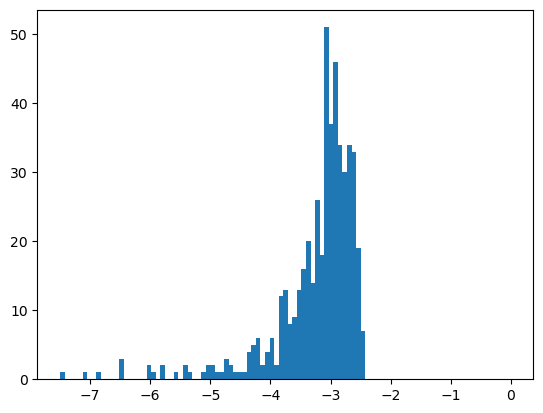

In [12]:
# make sure the cutoff isn't a pileup
hist(np.log10(training_label_df.training_density), bins=np.linspace(-7.5,0,100))

In [37]:
# write cleaned dataset to files
import gaia

# load training data
training_flux_df = pd.read_csv('./data/gaia_rvs_dataframes/training_flux.csv')
training_sigma_df = pd.read_csv('./data/gaia_rvs_dataframes/training_sigma.csv')

# clean training data based on neighbor density
training_label_df_cleaned = training_label_df.query('training_density > 1e-4')
training_label_df_cleaned["source_id"]= training_label_df_cleaned["source_id"].astype(str)

# write to .csv, .fits files
gaia.write_labels_to_file(training_label_df_cleaned, 'training_iter1')

# write training set flux, ivar to fits files for the cannon
gaia.write_flux_data_to_fits(
    training_flux_df[training_label_df_cleaned.source_id], 
    training_sigma_df[training_label_df_cleaned.source_id], 
    'training_iter1')

gaia.write_flux_data_to_csv(
    training_flux_df[training_label_df_cleaned.source_id], 
    training_sigma_df[training_label_df_cleaned.source_id], 
    'training_iter1')

/var/folders/pk/t44zjr6913b62d97t1gt20680000gn/T/ipykernel_11909/2725515016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_label_df_cleaned["source_id"]= training_label_df_cleaned["source_id"].astype(str)


training_iter1 labels saved to ./data/label_dataframes/training_iter1_labels.csv
training_iter1 flux array saved to ./data/cannon_training_data/training_iter1_flux.fits
training_iter1 sigma array saved to ./data/cannon_training_data/training_iter1_sigma.fits
training_iter1 flux, sigma dataframe saved to:
./data/gaia_rvs_dataframes/training_iter1_flux.csv
./data/gaia_rvs_dataframes/training_iter1_sigma.csv


In [35]:
ls ./data/label_dataframes/

cks_cannon.csv
cks_labels.csv
elbadry_singles_labels.csv
elbadry_tableE3_binaries_labels.csv
gaia_rvs_model_training_labels.csv
galah_binaries_labels.csv
galah_control_labels.csv
raghavan_singles_labels.csv
raghavan_unresolved_binaries_labels.csv
spocs_cannon_labels.csv
spocs_labels.csv
test_labels.csv
training_cannon_labels.csv
training_iter1_labels.csv
training_labels.csv


In [36]:
ls ./data/gaia_rvs_dataframes/

cks_flux.csv                            raghavan_resolved_binaries_sigma.csv
cks_sigma.csv                           raghavan_singles_flux.csv
elbadry_singles_flux.csv                raghavan_singles_sigma.csv
elbadry_singles_sigma.csv               raghavan_unresolved_binaries_flux.csv
elbadry_tableE3_binaries_flux.csv       raghavan_unresolved_binaries_sigma.csv
elbadry_tableE3_binaries_sigma.csv      spocs_flux.csv
galah_binaries_flux.csv                 spocs_sigma.csv
galah_binaries_sigma.csv                test_flux.csv
galah_control_flux.csv                  test_sigma.csv
galah_control_sigma.csv                 training_flux.csv
raghavan_resolved_binaries_flux.csv     training_sigma.csv
